# Lectura

In [ ]:
import pandas as pd
import os
import gc
import pyarrow.feather as feather

df=pd.DataFrame()
directory = '/content/drive/MyDrive/TFM/'
for filename in os.listdir(directory):
  if filename.endswith(".feather"):
      filepath = os.path.join(directory, filename)
      df_temp = pd.read_feather(filepath)
      df_temp.drop(columns=['x_pos', 'y_pos'], inplace = True)
      df_temp['target']=filename.split('_')[0]
      df = pd.concat([df,df_temp], ignore_index=True)
      del df_temp
      gc.collect()
      print(filename+' joined')

X=df.drop(columns=['target'])
y=df['target']

gc.collect()

ALL B Ph+_1_1.feather joined
ALL B Ph-_1_1.feather joined
ALL T_1_1.feather joined
AML M0_1_2.feather joined
AML M1_1_1.feather joined
AML M2_1_1.feather joined
AML M3_1_1.feather joined
AML M5a_1_1.feather joined
AML M6_1_1.feather joined


0

# Preprocesado

## Preprocesado obligatorio (acotar frecuencias y vector de frecuencias equidistante de 2 cm⁻¹)

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

def sep_2cm(X):
    X.columns = X.columns.astype(float)
    X=X.interpolate(method='index', limit_direction='both', axis=1) #Nos deshacemos de NaNs mediante inerpolación

    wavenumbers = X.columns
    new_wavenumbers = np.arange(start=wavenumbers.min(), stop=wavenumbers.max(), step=2)
    X_step = pd.DataFrame(columns=new_wavenumbers)

    for index, row in X.iterrows():
        intensities = row.values
        interpolator = interp1d(wavenumbers, intensities, kind='linear', fill_value="extrapolate")
        new_intensities = interpolator(new_wavenumbers)
        X_step.loc[index] = new_intensities
    return X_step

In [ ]:
def acotar(X, truncation_min, truncation_max):
    data_copy = X.copy()
    data_copy.columns = data_copy.columns.astype(float)
    wavenumbers = data_copy.columns
    wavenumbers_filtered = wavenumbers[(wavenumbers >= truncation_min) & (wavenumbers <= truncation_max)]

    return data_copy[wavenumbers_filtered.astype(float)]

In [ ]:
X_pre = sep_2cm(acotar(df,550,3100))

In [ ]:
#X_pre.to_feather('/content/drive/MyDrive/TFM/preprocesado/X_obligatorio.feather') #guaradmos en disco para usarlo depues

In [ ]:
import pandas as pd
X_pre = pd.read_feather('/content/drive/MyDrive/TFM/preprocesado/X_obligatorio.feather') #cargamos el feather guardado previamente  si es necesario

In [ ]:
X_pre

,550.52026,552.52026,554.52026,556.52026,558.52026,560.52026,562.52026,564.52026,566.52026,568.52026,...,3080.52026,3082.52026,3084.52026,3086.52026,3088.52026,3090.52026,3092.52026,3094.52026,3096.52026,3098.52026
0,28.995710,34.935449,31.842764,31.680421,26.417784,28.858629,29.887627,32.925023,38.213969,35.177332,...,205.164185,203.049788,205.757240,195.610767,188.286502,191.846101,226.886312,232.355851,221.886168,203.309601
1,28.159023,35.952655,33.703928,32.029490,35.792795,35.707086,23.646416,34.253074,34.186327,35.315157,...,199.709256,219.988590,199.473717,204.120878,212.108578,217.368127,234.599242,225.425026,219.646005,233.378159
2,31.275982,30.423199,29.108172,32.508335,32.931335,24.105295,25.286462,24.287473,32.380025,34.007255,...,194.380364,182.589265,179.755882,189.191761,207.900111,230.906730,220.828878,207.767702,211.289904,241.568115
3,28.629328,32.191050,33.274833,32.321176,29.126927,31.675708,28.918365,29.849063,30.464074,33.181025,...,210.913132,228.698517,230.962172,209.736048,198.076328,207.551801,232.385121,245.842408,254.947928,263.191772
4,34.154732,30.358749,28.206415,33.620855,27.419311,28.406549,29.152284,25.919308,31.217492,29.878993,...,192.952585,190.908061,189.948150,200.722037,214.377916,225.133231,209.073370,219.853313,232.095338,231.773773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36859,31.061932,32.255193,35.956585,34.568819,33.901247,33.857931,35.804426,31.902469,30.785891,33.362958,...,173.735288,174.131097,179.491625,193.972177,187.862788,190.891787,194.548669,190.509005,195.377490,205.256573
36860,35.630032,33.760820,35.567480,36.105950,36.089690,35.544801,36.774446,34.742364,35.948563,35.467673,...,172.489402,175.015726,179.628291,187.818008,187.839106,191.444812,194.761709,193.951092,196.246241,201.995337
36861,38.036789,35.979316,34.809533,36.781119,34.646460,36.791322,35.621377,34.823373,35.792475,35.417152,...,168.000439,176.293111,183.615512,186.537559,191.347147,193.683057,195.034771,196.783213,200.978916,206.096314
36862,36.713734,37.895526,37.931970,35.336973,36.614967,35.613472,35.657778,37.878002,36.154397,36.615222,...,170.725696,175.450877,176.390461,172.283746,182.974999,187.482490,190.306710,195.732348,196.050060,201.331174


## Tratamiento del background

In [ ]:
def background(data, clustering_min=2800, clustering_max=3030):
    from sklearn.cluster import KMeans
    from scipy.ndimage import label, binary_erosion, generate_binary_structure
    import numpy as np
    import pandas as pd

    # Convertir las columnas del DataFrame a tipo float para asegurar que los tipos son correctos
    data_copy = data.copy()
    data_copy.columns = data_copy.columns.astype(float)
    wavenumbers = data_copy.columns

    # Filtrar las frecuencias dentro del rango especificado
    wavenumbers_clustering = wavenumbers[(wavenumbers >= clustering_min) & (wavenumbers <= clustering_max)]
    data_clustering = data_copy[wavenumbers_clustering]

    # Realizar k-means con 4 clusters
    kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)
    clusters = kmeans.fit_predict(data_clustering)

    # Encontrar el cluster con la media de intensidad más baja
    cluster_means = pd.DataFrame(data_clustering).groupby(clusters).mean().mean(axis=1)
    background_cluster = cluster_means.idxmin()

    # Calcular el espectro medio del cluster con la media de intensidad más baja
    background_spectra = data_copy[clusters == background_cluster]
    background_median_spectrum = background_spectra.median()

    # Se resta el espectro de fondo del DataFrame original y luego se aplica np.maximum para asegurarse de que no haya valores negativos
    data_corrected = np.maximum(0, data_copy - background_median_spectrum)

    # Excluir los datos del cluster de fondo del conjunto de datos corregido
    foreground_data = data_corrected[clusters != background_cluster]

    # Generar una máscara para los datos de primer plano
    foreground_mask = np.ones(len(foreground_data), dtype=bool)

    # Identificar y eliminar pequeñas regiones aisladas (componentes conectados con menos de 64 píxeles)
    structure = generate_binary_structure(1, 1)
    labeled_array, num_features = label(foreground_mask, structure=structure)
    sizes = np.bincount(labeled_array.ravel())
    mask_sizes = sizes >= 64
    mask_sizes[0] = 0
    foreground_mask = mask_sizes[labeled_array]

    # Aplicar erosión morfológica a la máscara del primer plano
    foreground_mask_eroded = binary_erosion(foreground_mask, structure=np.ones((3,)))

    # Aplicar la máscara final a los datos corregidos
    return foreground_data.loc[foreground_mask_eroded]


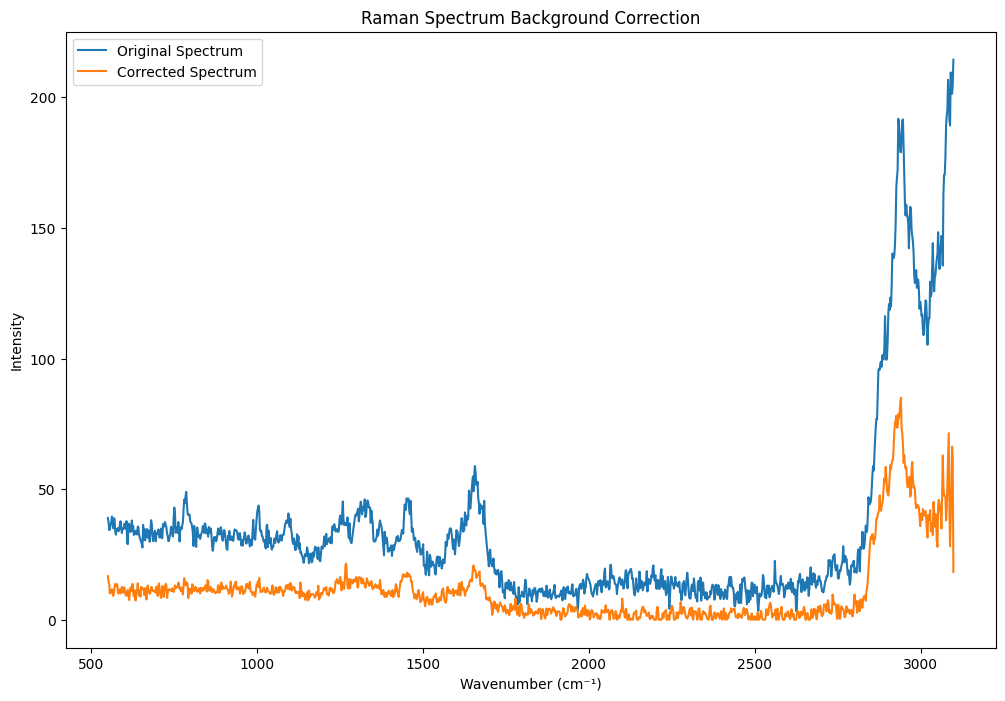

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(acotar(X_pre,550,3100).iloc[6000], label='Original Spectrum')
plt.plot(background(X_pre).iloc[6000], label='Corrected Spectrum')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')
plt.legend()
plt.title('Raman Spectrum Background Correction')
plt.show()

## Whittaker Eilers Smoother

In [ ]:
def whittaker_eilers_smoother(df, lmbda=100, d=2):
    def apply_whittaker_eilers_smoother(series):
        import numpy as np
        from scipy.sparse import eye, diags
        from scipy.sparse.linalg import spsolve

        y = series.values
        m = len(y)
        E = eye(m, format='csc')
        D = E[1:] - E[:-1]
        for i in range(1, d):
            D = D[1:] - D[:-1]

        H = lmbda * D.T @ D
        z = spsolve(E + H, y)
        return pd.Series(z, index=series.index, name=series.name)

    return df.apply(apply_whittaker_eilers_smoother, axis=1)

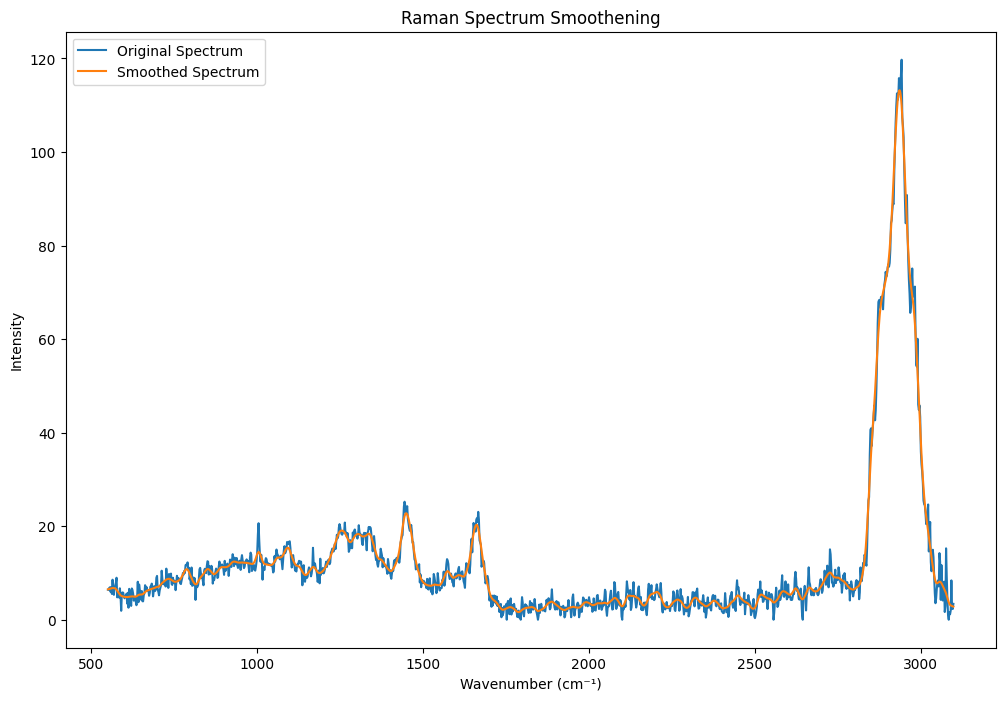

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(X_background.iloc[9000], label='Original Spectrum')
plt.plot(whittaker_eilers_smoother(X_background).iloc[9000], label='Smoothed Spectrum')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')
plt.legend()
plt.title('Raman Spectrum Smoothening')
plt.show()

##  Baseline correction

### Rubberband method

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial import ConvexHull

def rubberband_baseline_correction(df):
    def apply_rubberband(series):
        x = np.arange(len(series))
        y = series.values

        v = ConvexHull(np.column_stack([x, y])).vertices
        v = np.roll(v, -v.argmin())
        v = v[:v.argmax() + 1]

        baseline = np.interp(x, x[v], y[v])
        corrected = y - baseline
        return pd.Series(corrected, index=series.index, name=series.name)

    return df.apply(apply_rubberband, axis=1)

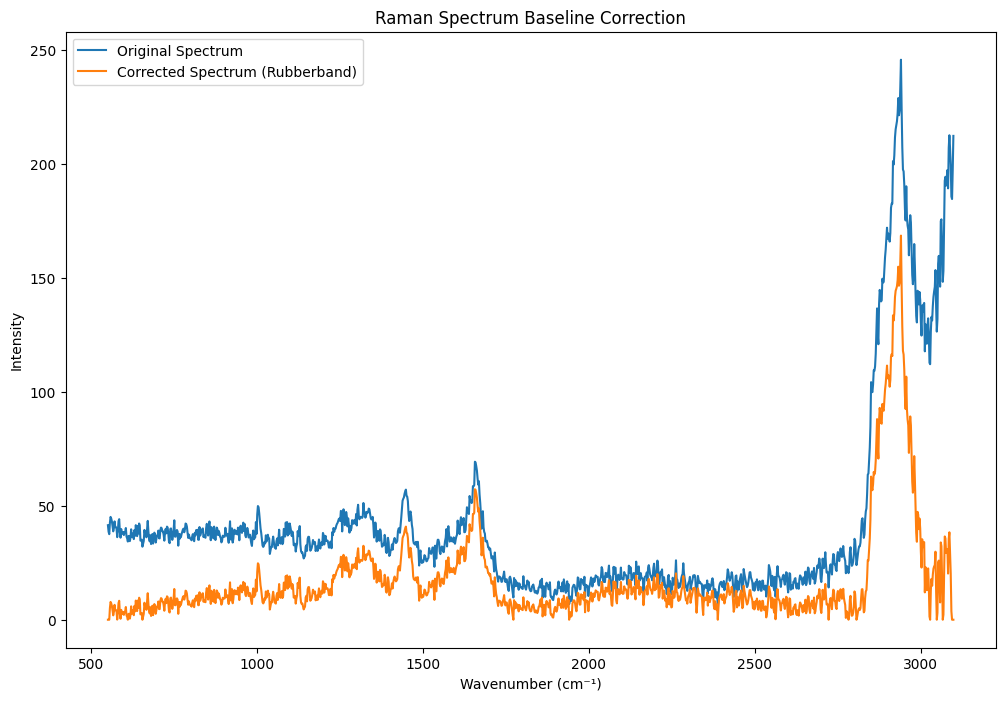

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(X_pre.iloc[7000], label='Original Spectrum')
plt.plot(rubberband_baseline_correction(X_pre).iloc[7000], label='Corrected Spectrum (Rubberband)')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')
plt.legend()
plt.title('Raman Spectrum Baseline Correction')
plt.show()

### SNIP (Statistics-sensitive Non-linear Iterative Peak-clipping)

In [ ]:
!pip install pybaselines

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from pybaselines import Baseline

def snip_baseline_correction(df, max_half_window=25):
    def apply_snip(series):
        y = series.values
        snip_baseline = Baseline().snip(y, max_half_window=max_half_window)[0]
        return pd.Series(y - snip_baseline, index=series.index, name=series.name)

    return df.apply(apply_snip, axis=1)

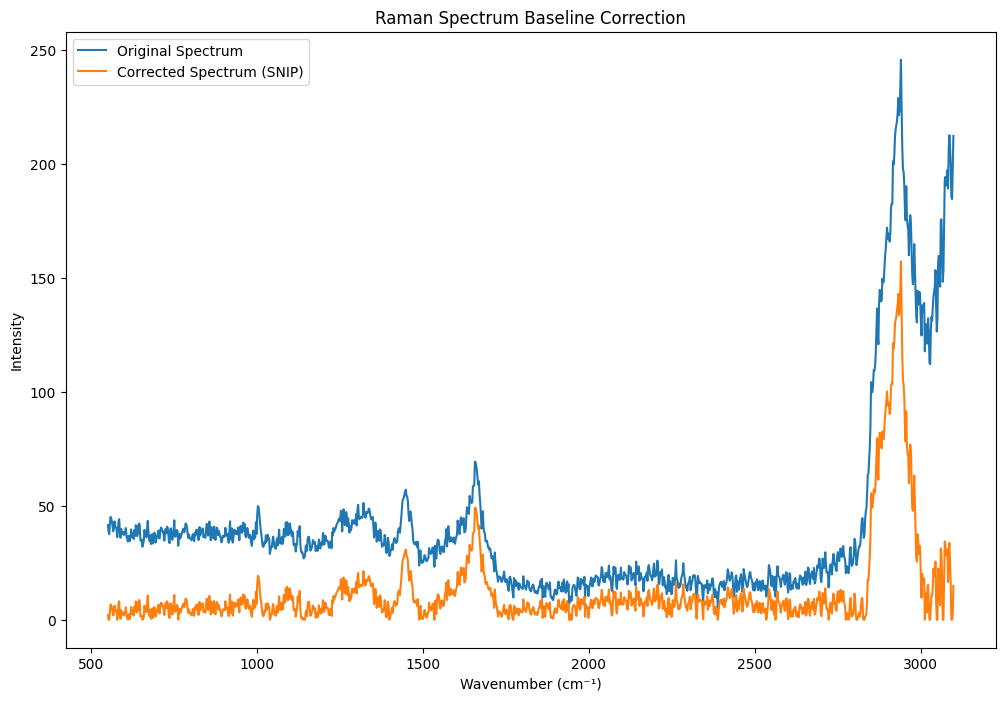

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(X_pre.iloc[7000], label='Original Spectrum')
plt.plot(snip_baseline_correction(X_pre).iloc[7000], label='Corrected Spectrum (SNIP)')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')
plt.legend()
plt.title('Raman Spectrum Baseline Correction')
plt.show()

### ASL

In [ ]:
import pandas as pd
from pybaselines import Baseline

def als_baseline_correction(df):
    def apply_als(series):
        y = series.values
        als_baseline = Baseline().asls(y)[0]
        return pd.Series(y - als_baseline, index=series.index, name=series.name)

    return df.apply(apply_als, axis=1)

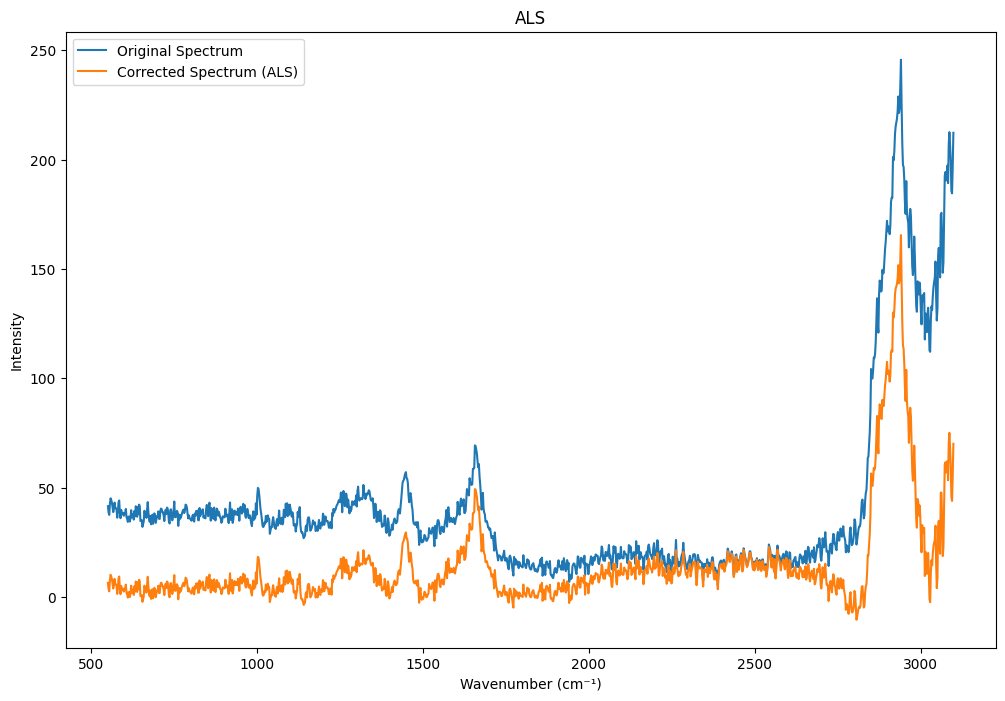

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(X_pre.iloc[7000], label='Original Spectrum')
plt.plot(als_baseline_correction(X_pre).iloc[7000], label='Corrected Spectrum (ALS)')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')
plt.legend()
plt.title('ALS')
plt.show()

## Normalizaciones

###  unit vector normalization (norma L2)

In [ ]:
import numpy as np
def unit_vector_normalization(X):
    def apply_unit_vector_normalization(series):
        return series / np.linalg.norm(series)

    return X.apply(apply_unit_vector_normalization, axis=1)

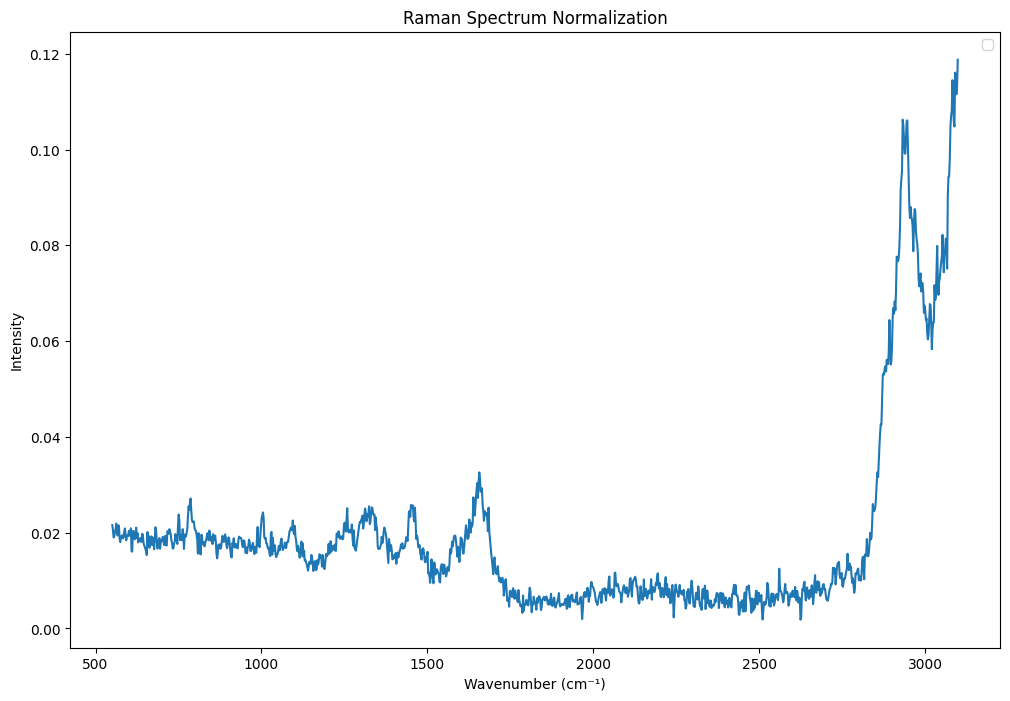

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(unit_vector_normalization(X_pre).iloc[6000])
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')
plt.title('Raman Spectrum Normalization')
plt.show()

In [ ]:
np.linalg.norm(unit_vector_normalization(X_pre).iloc[6000])

1.0

### Min max

In [ ]:
import numpy as np

def min_max(X):
  def apply_min_max(series):
    return (series - series.min()) / (series.max() - series.min())

  return X.apply(apply_min_max, axis=1)

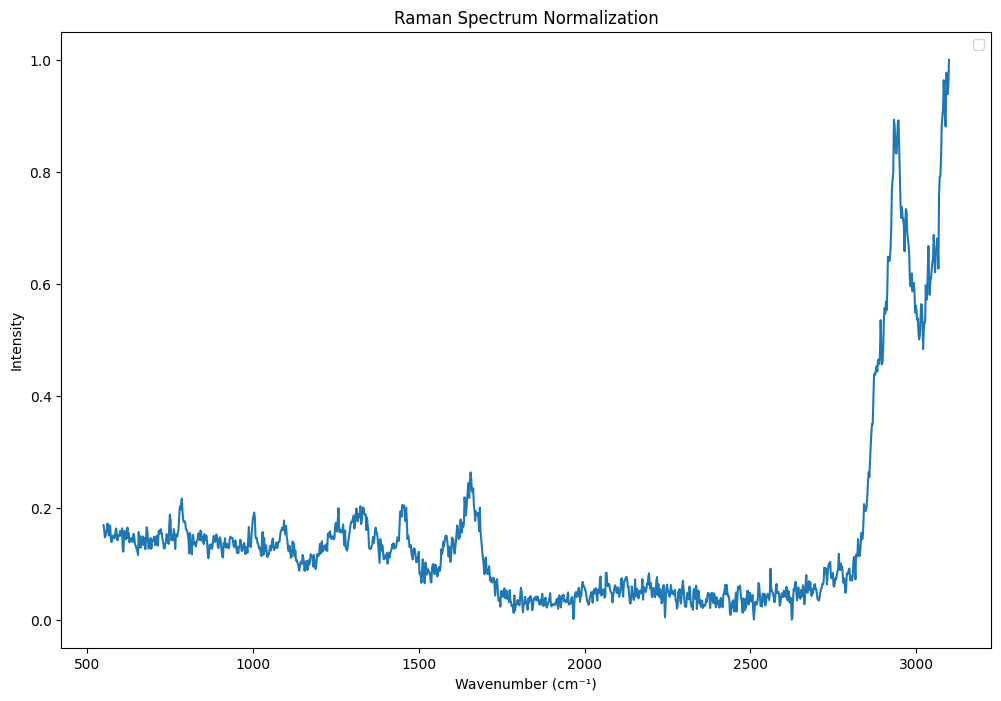

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(min_max(X_pre).iloc[6000])
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')
plt.title('Raman Spectrum Normalization')
plt.show()

In [ ]:
min_max(X_pre).iloc[6000].describe()

,6000
count,1275.000000
mean,0.147725
std,0.175260
min,0.000000
25%,0.047910
50%,0.111651
75%,0.149522
max,1.000000


### Standarización

In [ ]:
import numpy as np

def standard(X):
    def apply_standard(series):
        return (series - series.mean()) / series.std()

    return X.apply(apply_standard, axis=1)

In [ ]:
standard(X_pre).iloc[6000].describe()

,6000
count,1.275000e+03
mean,4.458307e-17
std,1.000000e+00
min,-8.428926e-01
25%,-5.695251e-01
50%,-2.058346e-01
75%,1.025207e-02
max,4.862930e+00


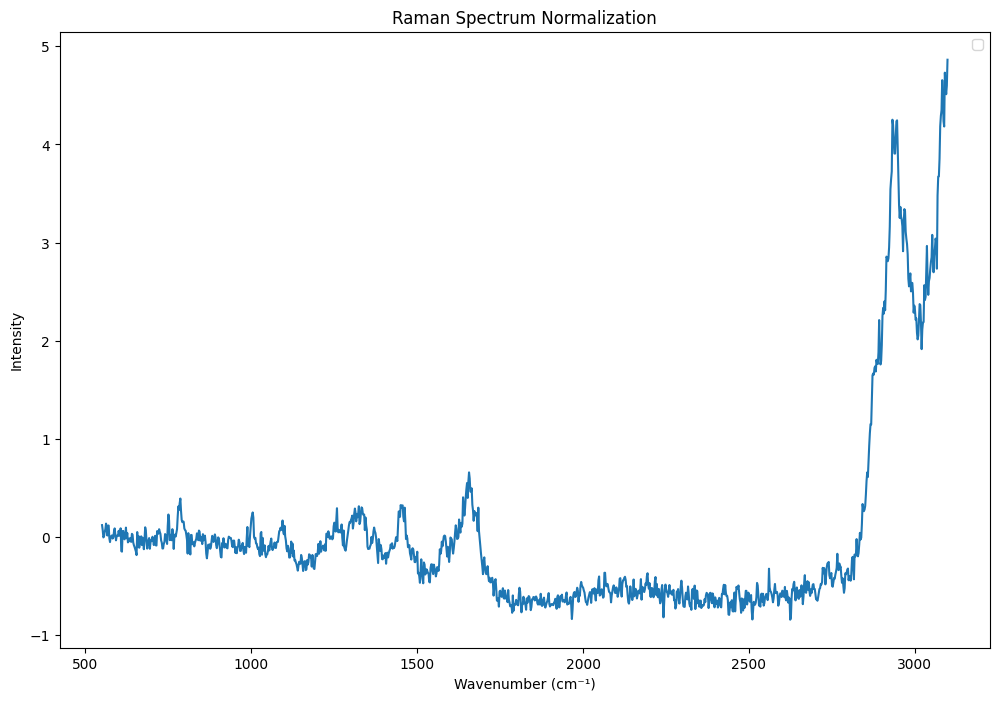

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(standard(X_pre).iloc[6000])
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')
plt.title('Raman Spectrum Normalization')
plt.show()

## Reducción de dimensionalidad

### Factor Analysis

In [ ]:
from sklearn.decomposition import FactorAnalysis

def FactorA(X, n_components=6):
    X_reduced = FactorAnalysis(n_components=n_components).fit_transform(X)
    return pd.DataFrame(X_reduced, index=X.index, columns=[f'FA{i+1}' for i in range(n_components)])

### Independent Component Analysis (ICA)

In [ ]:
from sklearn.decomposition import FastICA

def ICA(X, n_components=6):
    X_reduced = FastICA(n_components=n_components).fit_transform(X)
    return pd.DataFrame(X_reduced, index=X.index, columns=[f'IC{i+1}' for i in range(n_components)])

### Truncated SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD

def LSA(X, n_components=6):
    X_reduced = TruncatedSVD(n_components=n_components).fit_transform(X)
    return pd.DataFrame(X_reduced, index=X.index, columns=[f'LS{i+1}' for i in range(n_components)])

### Non-negative Matrix Factorization (NMF)

In [ ]:
from sklearn.decomposition import NMF
import numpy as np
import pandas as pd
"""
Dado que el standard scaler me va a dar numero negativos (inevitable con media 0),
para hacerlo compatible muevo los datos para que el minimo del dataframe sea 0.
Podria poner a estos dos preprocesados como incompatibles en el apartado posterior de comparativa,
pero dado que el arreglo es muy sencillo no hace falta esta restricción
"""

def NMF_f(X, n_components=6):
    # Movemos los datos para que el minimo sea 0
    min_value = X.min().min()
    if min_value < 0:
        X_shifted = X - min_value
    else:
        X_shifted = X

    # Aplicar NMF
    X_reduced = NMF(n_components=n_components).fit_transform(X_shifted)

    return pd.DataFrame(X_reduced, index=X.index, columns=[f'NMF{i+1}' for i in range(n_components)])

### Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

def PCA_f(X, n_components=6):
    X_reduced = PCA(n_components=n_components).fit_transform(X)
    return pd.DataFrame(X_reduced, index=X.index, columns=[f'PC{i+1}' for i in range(n_components)])

### Incremental PCA (PCA_inc)

In [ ]:
from sklearn.decomposition import IncrementalPCA

def PCA_inc(X, n_components=6, batch_size=None):
    X_reduced = IncrementalPCA(n_components=n_components, batch_size=batch_size).fit_transform(X)
    return pd.DataFrame(X_reduced, index=X.index, columns=[f'PC{i+1}' for i in range(n_components)])

### Sparse PCA (PCA_sp)

In [ ]:
from sklearn.decomposition import SparsePCA

def PCA_sp(X, n_components=6):
    X_reduced = SparsePCA(n_components=n_components).fit_transform(X)
    return pd.DataFrame(X_reduced, index=X.index, columns=[f'SPC{i+1}' for i in range(n_components)])


# Comparativa de algoritmos

## Generamos las posible combinaciones de pasos de preprocesado

In [ ]:
import warnings
import itertools
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Defino funciones para combinar los pasos de preprocesado y aplicarlos a un DataFrame
def generate_preprocessing_combinations(preprocessing_steps, exclude_groups):
    combinations = []
    for L in range(1, len(preprocessing_steps)+1):
        for subset in itertools.combinations(preprocessing_steps, L):
            if not any(all(step in subset for step in group) for group in exclude_groups):
                combinations.append(subset)
    return combinations

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, FastICA, NMF, SparsePCA, IncrementalPCA, FactorAnalysis, TruncatedSVD
# Se definen las funciones que usare en el preprocesado
def acotado_600_1800(X): return acotar(X,600,1800)
def acotado_2800_3030(X): return acotar(X,2800,3030)

preprocessing_steps = [
    # Background
    background,
    # Funcionees de acotado
    acotado_600_1800,
    acotado_2800_3030,
    # Baseline correction
    rubberband_baseline_correction,
    snip_baseline_correction,
    als_baseline_correction,
    # Smoother
    whittaker_eilers_smoother,
    # Normalizaciones
    unit_vector_normalization,
    min_max,
    standard,
    # Reducción de dimensionalidad
    FactorA,
    ICA,
    LSA,
    NMF_f,
    PCA_f,
    PCA_inc,
    PCA_sp,
]

# Se aplican restricciones para seleccionar solo una normalización, una técnica de reducción de dimensionalidad, un tipo de acotamineto espectral y otras incompatibilidades
exclude_groups = [
    # Restricciones de normalización
    (unit_vector_normalization, standard),
    (unit_vector_normalization, min_max),
    (standard, min_max),
    # Restricciones de acotado y background
    (acotado_600_1800, acotado_2800_3030),
    # Restricciones para baseline
    (rubberband_baseline_correction, snip_baseline_correction),
    (rubberband_baseline_correction, als_baseline_correction),
    (snip_baseline_correction, als_baseline_correction),
    # Restricciones para técnicas de reducción de dimensionalidad
    (FactorA, ICA),
    (FactorA, LSA),
    (FactorA, NMF_f),
    (FactorA, PCA_f),
    (FactorA, PCA_inc),
    (FactorA, PCA_sp),
    (ICA, LSA),
    (ICA, NMF_f),
    (ICA, PCA_f),
    (ICA, PCA_inc),
    (ICA, PCA_sp),
    (LSA, NMF_f),
    (LSA, PCA_f),
    (LSA, PCA_inc),
    (LSA, PCA_sp),
    (NMF_f, PCA_f),
    (NMF_f, PCA_inc),
    (NMF_f, PCA_sp),
    (PCA_f, PCA_inc),
    (PCA_f, PCA_sp),
    (PCA_inc, PCA_sp),
]

combinations = generate_preprocessing_combinations(preprocessing_steps,exclude_groups)

In [ ]:
invalid_combinations = []
for combo in combinations:
    for exclude_group in exclude_groups:
        if all(step in combo for step in exclude_group):
            invalid_combinations.append(combo)

print(len(invalid_combinations))

0


In [ ]:
len(combinations)

1535

## Obetenemos el score de cada combiancion de pasos de preprocesado

In [ ]:
import pandas as pd
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def perform_classification(transformed_data, labels):
    X_train, X_test, y_train, y_test = train_test_split(transformed_data, labels[transformed_data.index], test_size=0.2, random_state=42)
    model = LogisticRegression(random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

def apply_and_evaluate(combo, data, labels):
    try:
        data_copy = data.copy()
        y_copy = labels.copy()

        for step in combo:
            data_copy = step(data_copy)

        accuracy = perform_classification(data_copy, y_copy)
        return combo, accuracy

    except Exception as e:
        print(f"Error en {combo}, con error: {e}")
        return combo, None


combinations = generate_preprocessing_combinations(preprocessing_steps,exclude_groups)
# Aplicar las combinaciones en paralelo y almacenar los resultados
results = dict(Parallel(n_jobs=-2)(delayed(apply_and_evaluate)(combo, X_pre, y) for combo in combinations))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


## Pasamos todo a un DataFrame

In [ ]:
import pandas as pd

def results_to_grouped_dataframe(results, step_groups):
    # Mapear las combinaciones de funciones a nombres
    mapped_results = {
        tuple(step.__name__ for step in combo): accuracy
        for combo, accuracy in results.items()
    }

    all_steps = set(step for combo in mapped_results.keys() for step in combo)

    # Obtener las columnas agrupadas y los pasos individuales
    grouped_columns = list(step_groups.keys())
    grouped_steps = set(step for group in step_groups.values() for step in group)
    individual_steps = sorted(all_steps - grouped_steps)

    # Creamos el DataFrame
    data_rows = []
    for combo, accuracy in mapped_results.items():
        row_data = {}
        for col_name, steps in step_groups.items():
            step_in_combo = [step for step in steps if step in combo]
            row_data[col_name] = step_in_combo[0] if step_in_combo else None
        for step in individual_steps:
            row_data[step] = 1 if step in combo else 0
        row_data['accuracy'] = accuracy
        data_rows.append(row_data)
    df = pd.DataFrame(data_rows)
    return df


step_groups = {
    'Normalizacion': ['unit_vector_normalization', 'min_max', 'standard'],
    'Acotacion': ['acotado_600_1800', 'acotado_2800_3030'],
    'Baseline_Correction': ['rubberband_baseline_correction', 'snip_baseline_correction', 'als_baseline_correction'],
    'Reduccion_de_dimensionalidad': ['FactorA', 'ICA', 'LSA', 'NMF_f', 'PCA_f', 'PCA_inc', 'PCA_sp']
}

df_results = results_to_grouped_dataframe(results, step_groups)

In [ ]:
feather.write_feather(df_results, '/content/drive/MyDrive/TFM/resultados/results.feather')

In [ ]:
df_results = feather.read_feather('/content/drive/MyDrive/TFM/resultados/results.feather')

In [ ]:
df_results

,Normalizacion,Acotacion,Baseline_Correction,Reduccion_de_dimensionalidad,background,whittaker_eilers_smoother,accuracy
0,None,None,None,None,1,0,0.998312
1,None,acotado_600_1800,None,None,0,0,0.825715
2,None,acotado_2800_3030,None,None,0,0,0.589177
3,None,None,rubberband_baseline_correction,None,0,0,0.970433
4,None,None,snip_baseline_correction,None,0,0,0.972467
...,...,...,...,...,...,...,...
1530,standard,acotado_2800_3030,als_baseline_correction,LSA,1,1,0.473418
1531,standard,acotado_2800_3030,als_baseline_correction,NMF_f,1,1,0.395218
1532,standard,acotado_2800_3030,als_baseline_correction,PCA_f,1,1,0.479606
1533,standard,acotado_2800_3030,als_baseline_correction,PCA_inc,1,1,0.483544


# Resultados

In [ ]:
df_results[df_results['Reduccion_de_dimensionalidad'].notna()].sort_values(by='accuracy', ascending=False).head(10)

,Normalizacion,Acotacion,Baseline_Correction,Reduccion_de_dimensionalidad,background,whittaker_eilers_smoother,accuracy
196,unit_vector_normalization,None,None,FactorA,1,0,0.974965
680,unit_vector_normalization,None,None,FactorA,1,1,0.974121
687,min_max,None,None,FactorA,1,1,0.967932
694,standard,None,None,FactorA,1,1,0.963994
189,None,None,None,FactorA,1,1,0.963150
26,None,None,None,FactorA,1,0,0.960900
210,standard,None,None,FactorA,1,0,0.958931
696,standard,None,None,LSA,1,1,0.953305
212,standard,None,None,LSA,1,0,0.952461
693,min_max,None,None,PCA_sp,1,1,0.951899


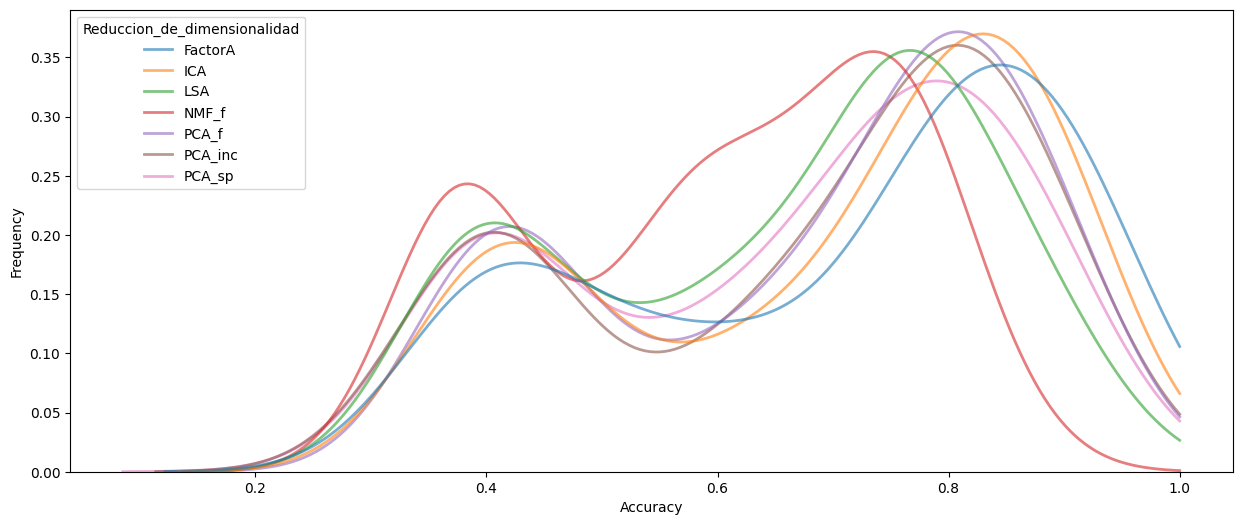

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.kdeplot(data=df_results, x='accuracy', hue='Reduccion_de_dimensionalidad', fill=False, alpha=0.6, linewidth=2, clip=(0, 1))  # Stacked histograms with kdeplt.title('Distribution of Age')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

In [ ]:
summary_stats = df_results.groupby('Reduccion_de_dimensionalidad')['accuracy'].agg(['mean', 'median', 'std', 'min', 'max'])

pd.DataFrame(summary_stats).sort_values(by='mean', ascending=False)

,mean,median,std,min,max
Reduccion_de_dimensionalidad,,,,,
FactorA,0.704150,0.772074,0.194217,0.325241,0.974965
ICA,0.693954,0.766242,0.187040,0.329677,0.946273
PCA_f,0.681239,0.752180,0.181603,0.358741,0.942897
PCA_inc,0.674236,0.748881,0.188428,0.311271,0.944023
PCA_sp,0.662171,0.717092,0.184310,0.278481,0.951899
LSA,0.650370,0.706329,0.175617,0.333379,0.953305
NMF_f,0.600621,0.623449,0.156379,0.302391,0.870886


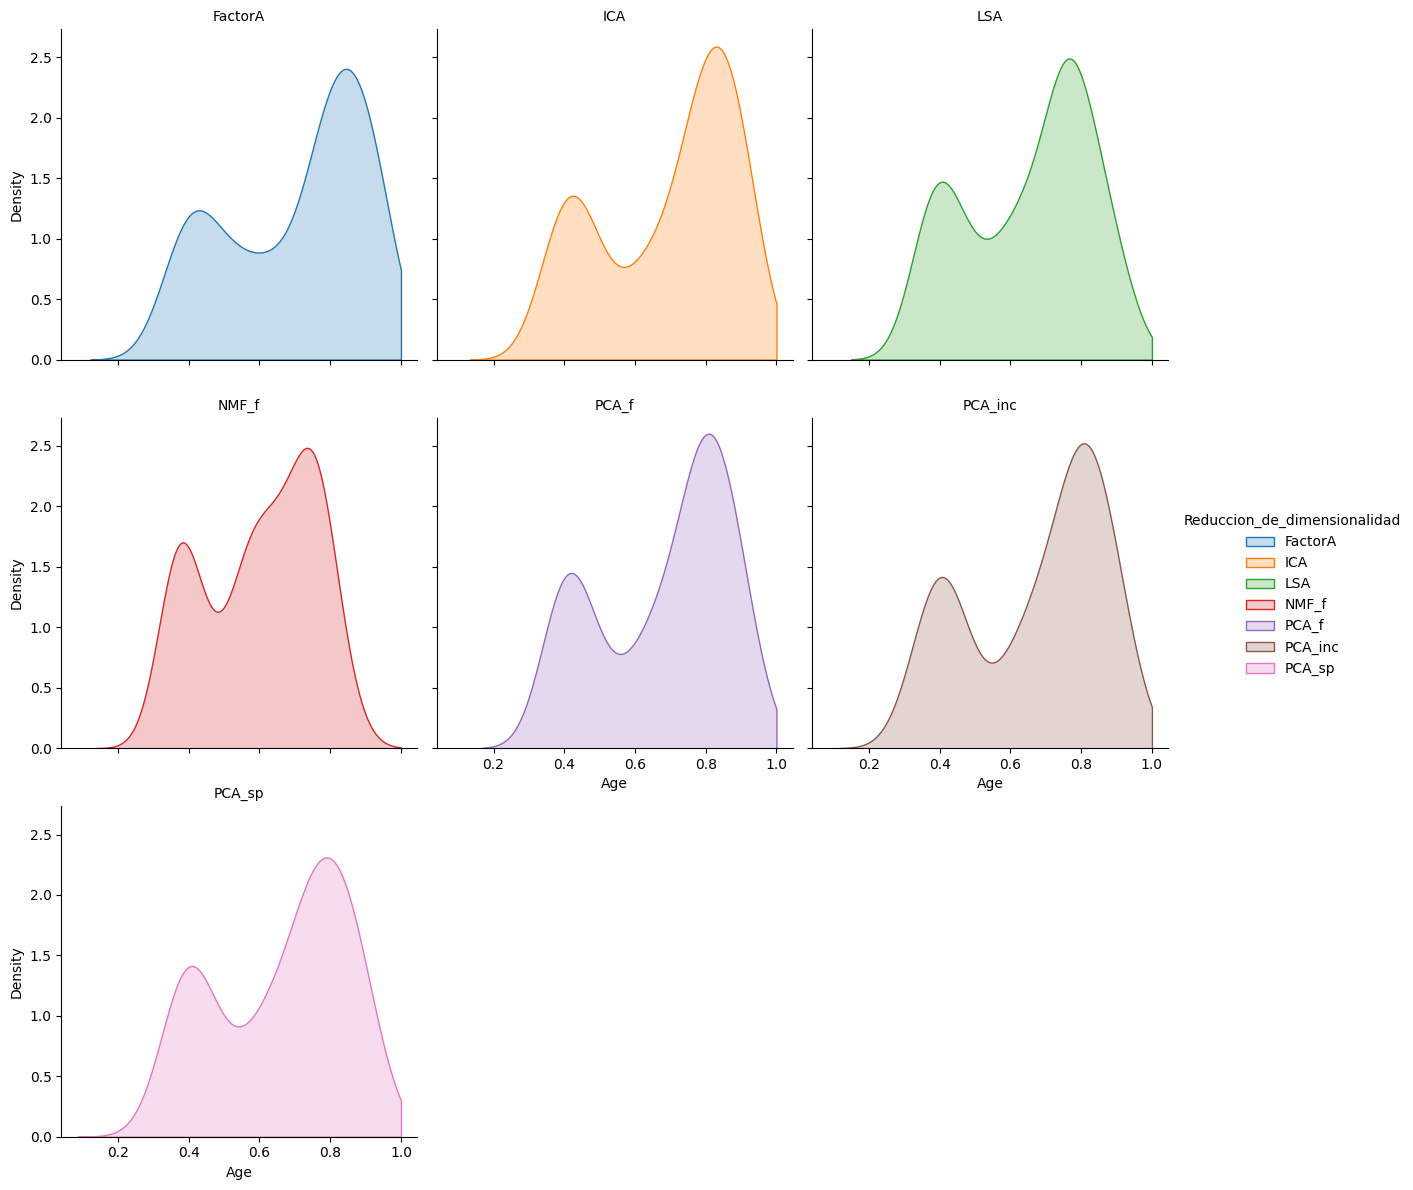

In [ ]:
g = sns.FacetGrid(df_results, hue="Reduccion_de_dimensionalidad", col="Reduccion_de_dimensionalidad", col_wrap=3, height=4, sharex=True, sharey=True)

g.map(sns.kdeplot, "accuracy", fill=True, clip=(0, 1))

g.set_titles("{col_name}")
g.set_axis_labels("Age", "Density")
g.add_legend()

# Show the plot
plt.show()

pruebas de graficos...

In [ ]:
df_copia_resultados = df_results.copy()
df_pivot = df_copia_resultados.pivot(index='Reduccion_de_dimensionalidad', columns=['Normalizacion', 'Acotacion', 'Baseline_Correction', 'background', 'whittaker_eilers_smoother'], values='accuracy')

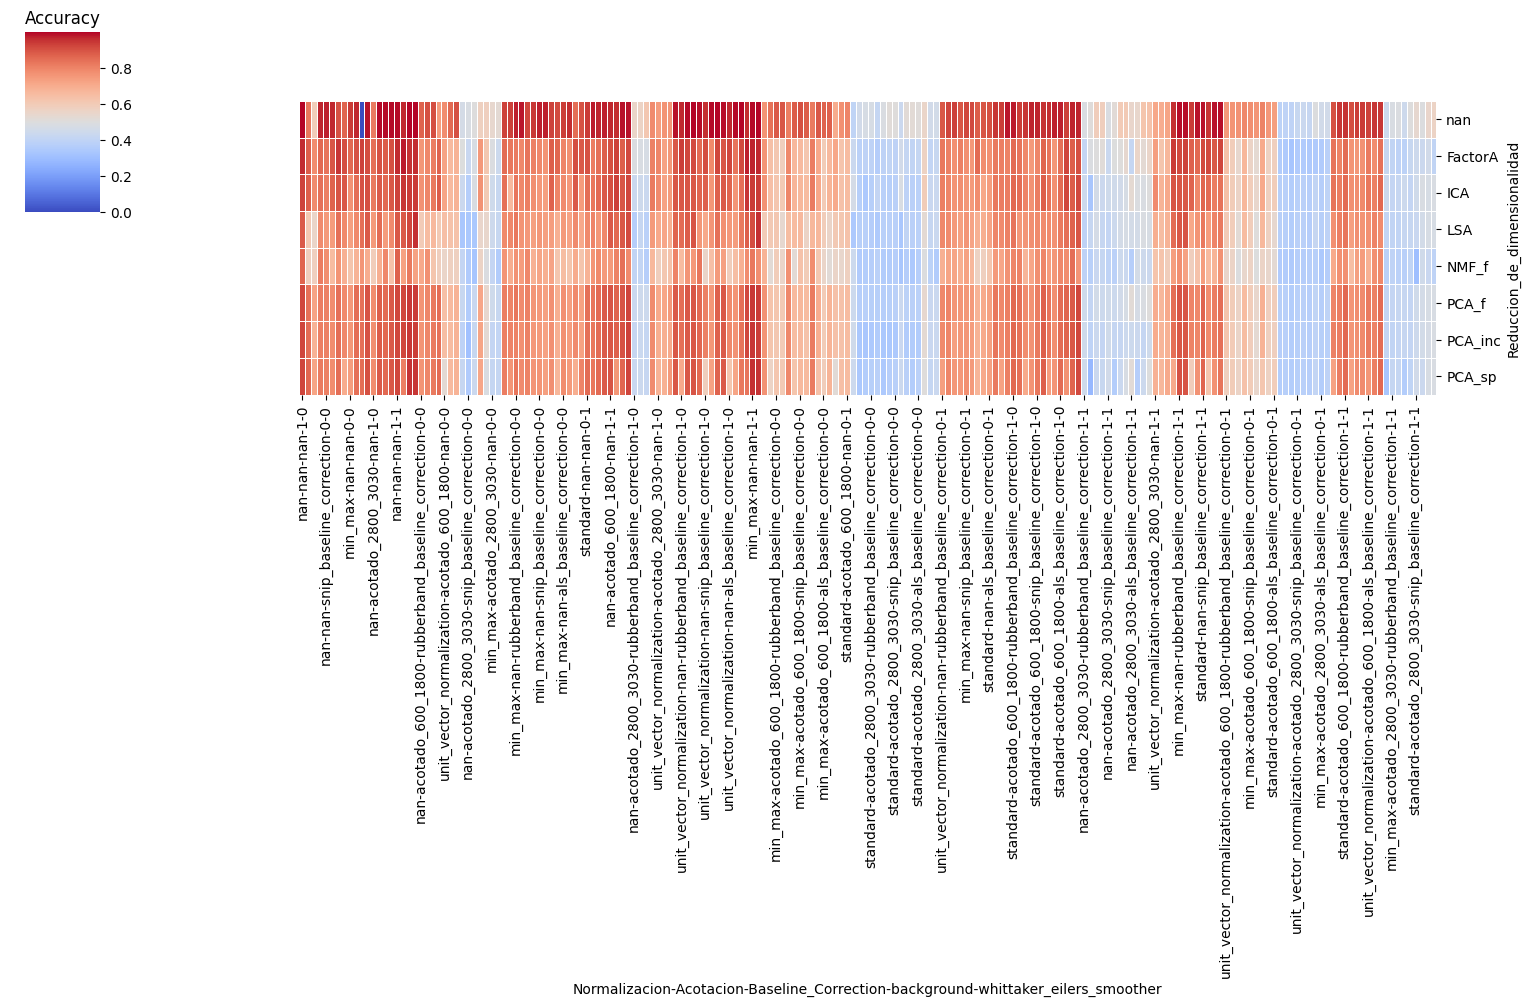

In [ ]:
import seaborn as sns

g = sns.clustermap(df_pivot.fillna(0), cmap='coolwarm', linewidths=.5, fmt=".2f", figsize=(15, 10), row_cluster=False,col_cluster=False)

g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
g.ax_cbar.set_title('Accuracy', fontsize=12)

# Show the plot
plt.show()

------------------------------------